In [ ]:
# 필요한 라이브러리 다운받기
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers

In [ ]:
# url로부터 데이터 읽어오기
from urllib.request import urlopen
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
raw_data = urlopen(url)
dataset = np.loadtxt(raw_data, delimiter=",")

In [ ]:
# 주어진 데이터 중 2개의 변수만 사용할 것
X=dataset[:,[1,3]]
# Y에는 True label(faked/real)을 저장
Y=dataset[:,4]

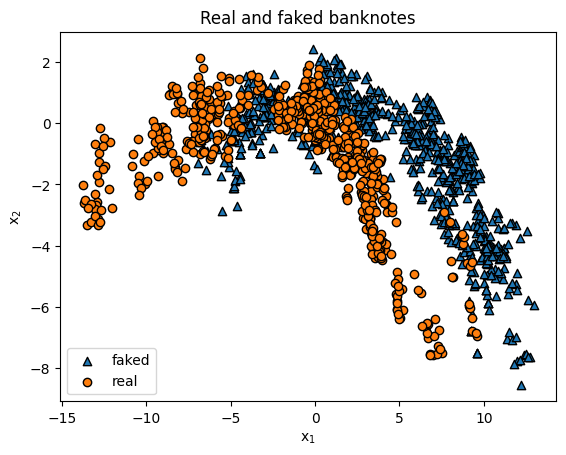

In [ ]:
# 주어진 데이터를 시각화해보기
idx_f = [np.where(Y==1)]
idx_r = [np.where(Y==0)]
params = {'mathtext.default': 'regular' }  #Nicer Plotting (Latex Style)
plt.rcParams.update(params)
plt.scatter(X[idx_r,0],X[idx_r,1], alpha=1.0,marker='^',edgecolor='black')
plt.scatter(X[idx_f,0],X[idx_f,1], alpha=1.0,marker='o',edgecolor='black')
plt.title("Real and faked banknotes")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend(("faked","real"),loc='lower left',fontsize=10)
plt.show()

In [ ]:
# 하나의 뉴런만을 가진 NN 만들기(Hidden layer가 없음)
model = Sequential()                               # sequential()로 모델 만들기 시작
model.add(Dense(1, batch_input_shape=(None, 2),    # 뉴런이 하나이기 때문에 Dense = 1, input size는 (batchsize, 2)
                activation='sigmoid'))             # activation function으로 sigmoid사용

sgd = optimizers.SGD(lr=0.15)                      # optimizer로 stochastic gradient descent사용, learning rate는 0.15로 설정

# 모델 컴파일링을 통해 모델 구축을 완료
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In the next cell, we train the network. In other words, we tune the parameters that were initialized randomly with stochastic gradient descent to minimize our loss function (the binary corssentropy). We set the batchsize to 128 per updatestep and train for 400 epochs.

In [ ]:
# 네트워크 training 하기
history = model.fit(X, Y,      # model.fit을 통해 네트워크를 fitting
          epochs=400,          # epoch(=training에서 iteration의 횟수)를 400으로 설정
          batch_size=128,      # batch size를 128로 설정
          verbose=0)


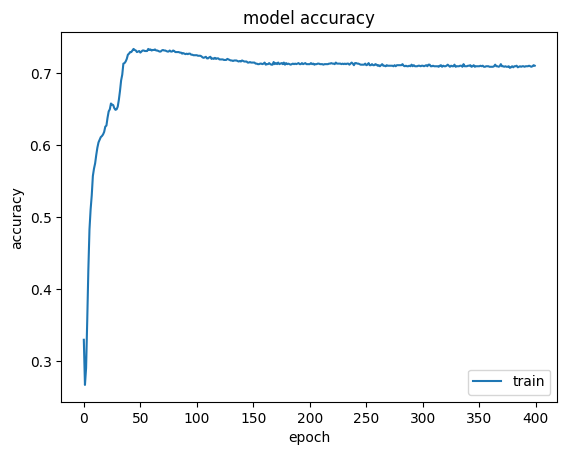

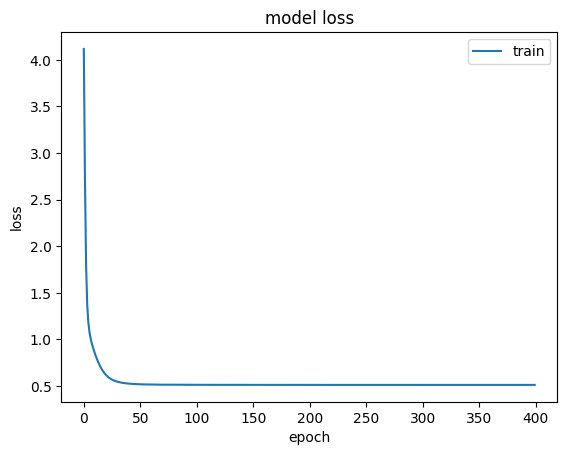

In [ ]:
# training이 진행되는 동안 accuracy와 loss의 변화 시각화하기
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 16ms/step
(2500, 1, 1)


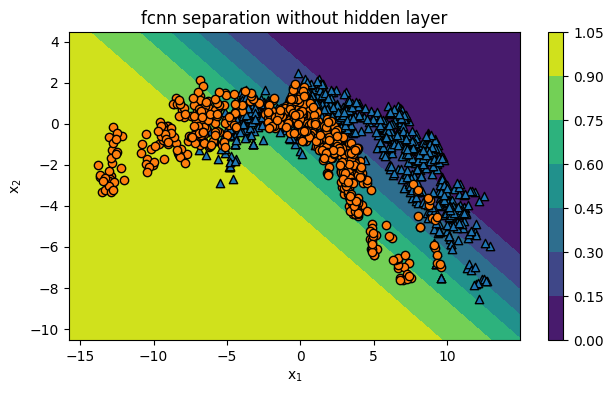

In [ ]:
def plotModel(X,Y, model, t): # 학습된 decision boundary를 보여주는 함수 작성

    x1list = np.linspace(np.min(X[:,0])-2, np.max(X[:,0])+2, 50)
    x2list = np.linspace(np.min(X[:,1])-2, np.max(X[:,1])+2, 50)
    X1_grid, X2_grid = np.meshgrid(x1list, x2list) # np.meshgrid를 통해 그림을 그릴 2차원 공간 생성

    # 각각의 x1과 x2값에 대해 model의 예측값 생성
    p = np.array([model.predict(np.reshape(np.array([l1,l2]),(1,2))) for l1,l2 in zip(np.ravel(X1_grid), np.ravel(X2_grid))])
    print(p.shape)
    if len(p.shape) == 3 and p.shape[2]==2:
        p = p[:,:,1] # pick p for class 1 if there are more than 2 classes
    p = np.reshape(p,X1_grid.shape)

    # 2차원 공간 위에 decision boundary 그리기
    params = {'mathtext.default': 'regular' }
    plt.rcParams.update(params) #점점 update하며 그리
    plt.figure(figsize=(16,4))

    plt.subplot(1,2,(1))
    cp = plt.contourf(X1_grid, X2_grid, p,cmap='viridis')
    plt.colorbar(cp)
    idx_f = [np.where(Y==1)]
    idx_r = [np.where(Y==0)]
    plt.scatter(X[idx_r,0],X[idx_r,1], alpha=1.0,marker='^',edgecolor='black') #위에 원자료 덧대기
    plt.scatter(X[idx_f,0],X[idx_f,1], alpha=1.0,marker='o',edgecolor='black')
    plt.title(t)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

plotModel(X, Y, model, 'fcnn separation without hidden layer') #위에서 정의한 함수 사용하여 시각화하기

In [ ]:
# Model을 training하기. 위와 동일하지만 이번에는 neuron이 8개인 Hidden layer와 outputlayer에도 2개의 neuron을 둘 것
model = Sequential() # outputlayer에도 2개의 neuron을 둘 것
model.add(Dense(8, batch_input_shape=(None, 2),activation='sigmoid')) # 이번에는 neron이 8개인 hidden layer이기 때문에 dense = 8
model.add(Dense(2, activation='softmax')) #나머지는 위의 환경과 동일하게 세팅

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
# 이번에는 output layer에도 neuron이 두 개이기 때문에 Y의 형태를 바꿔줌
Y_c=to_categorical(Y,2)
Y[0:5], Y_c[0:5],Y[-5:-1],Y_c[-5:-1]

(array([0., 0., 0., 0., 0.]),
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]], dtype=float32),
 array([1., 1., 1., 1.]),
 array([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]], dtype=float32))

In [ ]:
# 위와 동일하게 network training
history = model.fit(X, Y_c,
          epochs=400,
          batch_size=128,
          verbose=0)

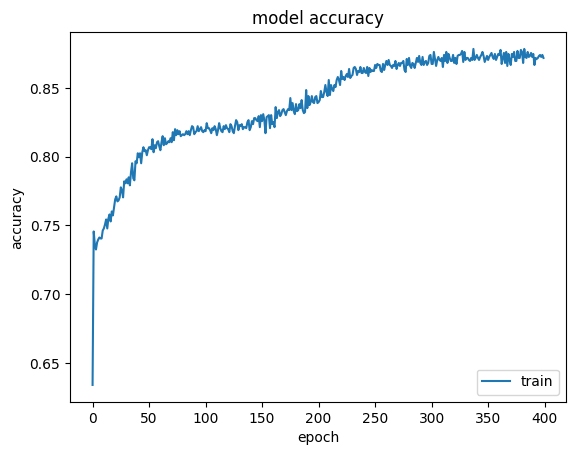

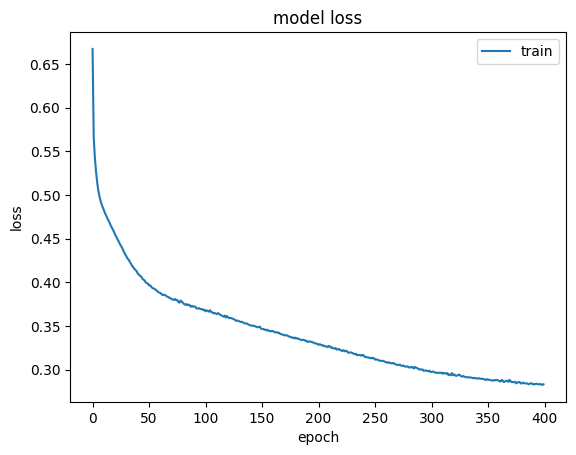

In [ ]:
# training이 진행되는 동안 accuracy와 loss의 변화 시각화하기
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()


1/1 [==============================] - 0s 18ms/step
(2500, 1, 2)


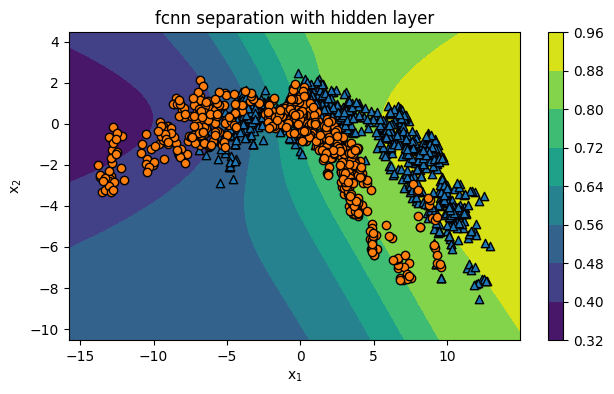

In [ ]:
plotModel(X,Y,model, 'fcnn separation with hidden layer')
# 위에서 정의한 함수를 이용해 decision boundary를 시각화해봄.